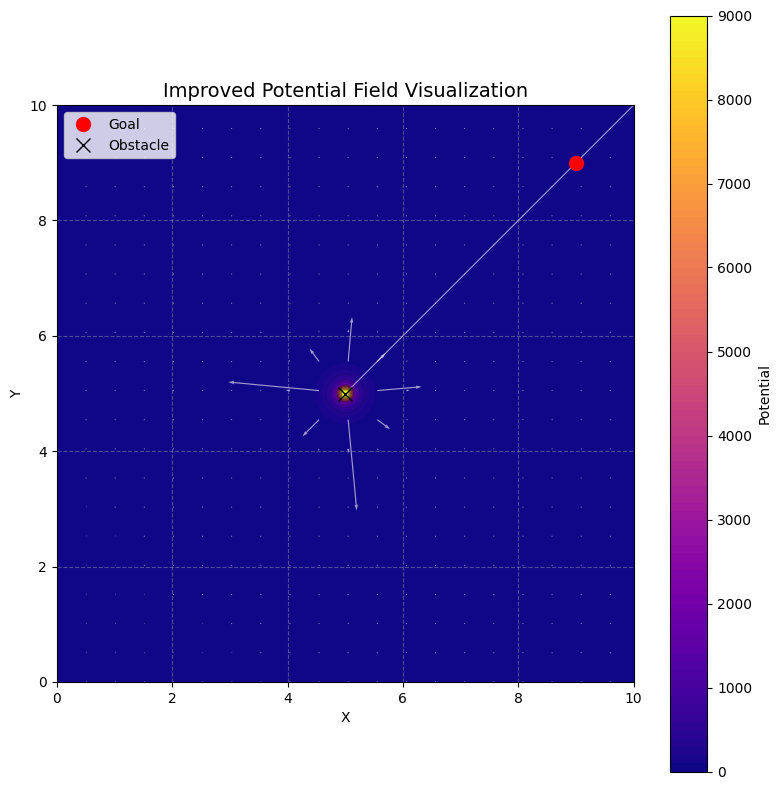

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create mesh grid for the environment
x_grid, y_grid = np.meshgrid(np.linspace(0, 10, 100), np.linspace(0, 10, 100))
goal_position = np.array([9, 9])
obstacle_position = np.array([5, 5])

# Attractive potential - parabolic shape centered at goal
U_attractive = 0.5 * ((x_grid - goal_position[0])**2 + (y_grid - goal_position[1])**2)

# Repulsive potential - only active within influence radius
influence_scale = 100    # scaling factor
influence_radius = 1.5   # radius of influence
distance_to_obstacle = np.sqrt((x_grid - obstacle_position[0])**2 + (y_grid - obstacle_position[1])**2)
U_repulsive = np.where(
    distance_to_obstacle <= influence_radius,
    0.5 * influence_scale * ((1/distance_to_obstacle - 1/influence_radius)**2),
    0
)

# Combined potential field
U_total = U_attractive + U_repulsive

# Calculate negative gradient for direction guidance
gradient_y, gradient_x = np.gradient(-U_total)

# Create visualization
fig, ax = plt.subplots(figsize=(8, 8))
contour_fill = ax.contourf(x_grid, y_grid, U_total, levels=100, cmap='plasma')
colorbar = plt.colorbar(contour_fill, ax=ax, label='Potential')
ax.contour(x_grid, y_grid, U_total, levels=30, colors='black', linewidths=0.3, alpha=0.3)

# Add direction vectors (quiver plot)
skip_factor = 5
ax.quiver(
    x_grid[::skip_factor, ::skip_factor],
    y_grid[::skip_factor, ::skip_factor],
    gradient_x[::skip_factor, ::skip_factor],
    gradient_y[::skip_factor, ::skip_factor],
    color='white', alpha=0.6, width=0.002
)

# Mark goal and obstacle positions
ax.plot(goal_position[0], goal_position[1], 'ro', markersize=10, label='Goal')
ax.plot(obstacle_position[0], obstacle_position[1], 'kx', markersize=10, label='Obstacle')

# Add labels and formatting
ax.set_title("Potential Field Visualization", fontsize=14)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_aspect('equal')
ax.grid(True, linestyle='--', alpha=0.4)
ax.legend(loc='upper left')
plt.tight_layout()
plt.show()